## ARIMA

### AR & MA Models
In time series, autoregression(AR) and moving average (MA) models provide a simple description of a process in terms of two factors--one for autoregression and the other for moving average. The AR part entails regressing the variable on its own lagged values. The idea is that the previous time period's value can help us predict the current time period's value. The MA part involves modeling the error term as a linear combination of error terms occurring at the same time step and at various times in the past.

### Autoregressive Models
Autoregressive (AR) Model is when present value of a time series can be predicted from using previous values of the same series. It's a regression using its same series, though shifted by a time step, called a lag. The present value is a weighted average of its past values. Both the t-1 and t-2 are lags of the time series y. The error term (noise) is represented as e. The values a1 and a2 are the coefficients of the model.

AR(1) model: $y_{t}$ = $a_{1}$ $y_{t-1}$ + $e_{t}$

AR(2) model: $y_{t}$ = $a_{1}$ $y_{t-1}$ + $a_{2}$ $y_{t-2}$ + $e_{t}$

We typically represent the order of the model as p for an AR model such as AR(p).

### Moving Average Models
Moving average (MA) is a process where the present value of a time series, y, is defined as a linear combination of past errors. The error term (noise) is represented as e. Both the t-1 and t-2 are lags of the time on the errors.

MA(1) model: $y_{t}$ = $m_{1}$ $e_{t-1}$ + $e_{t}$

MA(2) model: $y_{t}$ = $m_{1}$ $e_{t-1}$ + $m_{2}$ $e_{t-2}$ + $e_{t}$

We typically represent the order of the model as q for a MA model such as MA(q).

### ARMA Models
We can combine both Autoregressive and Moving Average models together to create an ARMA model. The time series is regressed on the previous values and the previous errors.

ARMA(1,1) model: $y_{t}$ = $a_{1}$ $y_{t-1}$ + $m_{1}$ $e_{t-1}$

For ARMA(p, q), p is the order of the AR process and q is the order of the MA process.

## Forecast quality metrics

Before we begin forecasting, let's understand how to measure the quality of our predictions and take a look at the most commonly used metrics.

- [R squared](http://scikit-learn.org/stable/modules/model_evaluation.html#r2-score-the-coefficient-of-determination): coefficient of determination (in econometrics, this can be interpreted as the percentage of variance explained by the model), $(-\infty, 1]$

$R^2 = 1 - \frac{SS_{res}}{SS_{tot}}$ 

```python
sklearn.metrics.r2_score
```
---
- [Mean Absolute Error](http://scikit-learn.org/stable/modules/model_evaluation.html#mean-absolute-error): this is an interpretable metric because it has the same unit of measurment as the initial series, $[0, +\infty)$

$MAE = \frac{\sum\limits_{i=1}^{n} |y_i - \hat{y}_i|}{n}$ 

```python
sklearn.metrics.mean_absolute_error
```
---
- [Median Absolute Error](http://scikit-learn.org/stable/modules/model_evaluation.html#median-absolute-error): again, an interpretable metric that is particularly interesting because it is robust to outliers, $[0, +\infty)$

$MedAE = median(|y_1 - \hat{y}_1|, ... , |y_n - \hat{y}_n|)$

```python
sklearn.metrics.median_absolute_error
```
---
- [Mean Squared Error](http://scikit-learn.org/stable/modules/model_evaluation.html#mean-squared-error): the most commonly used metric that gives a higher penalty to large errors and vice versa, $[0, +\infty)$

$MSE = \frac{1}{n}\sum\limits_{i=1}^{n} (y_i - \hat{y}_i)^2$

```python
sklearn.metrics.mean_squared_error
```
---
- [Mean Squared Logarithmic Error](http://scikit-learn.org/stable/modules/model_evaluation.html#mean-squared-logarithmic-error): practically, this is the same as MSE, but we take the logarithm of the series. As a result, we give more weight to small mistakes as well. This is usually used when the data has exponential trends, $[0, +\infty)$

$MSLE = \frac{1}{n}\sum\limits_{i=1}^{n} (log(1+y_i) - log(1+\hat{y}_i))^2$

```python
sklearn.metrics.mean_squared_log_error
```
---
- Mean Absolute Percentage Error: this is the same as MAE but is computed as a percentage, which is very convenient when you want to explain the quality of the model to management, $[0, +\infty)$

$MAPE = \frac{100}{n}\sum\limits_{i=1}^{n} \frac{|y_i - \hat{y}_i|}{y_i}$ 

```python
def mean_absolute_percentage_error(y_true, y_pred): 
    return np.mean(np.abs((y_true - y_pred) / y_true)) * 100
```

### Analítica
Vamos a utilizar los datos de ventas de Johnson&Johnson

In [1]:
pip install pmdarima

   ---------------------------------------- 0.0/613.3 kB ? eta -:--:--
   --------- ------------------------------ 143.4/613.3 kB 4.3 MB/s eta 0:00:01
   -------------------------------- ------- 491.5/613.3 kB 6.2 MB/s eta 0:00:01
   ---------------------------------------  604.2/613.3 kB 6.3 MB/s eta 0:00:01
   ---------------------------------------- 613.3/613.3 kB 4.3 MB/s eta 0:00:00
   ---------------------------------------- 0.0/2.8 MB ? eta -:--:--
   ----------------- ---------------------- 1.2/2.8 MB 26.1 MB/s eta 0:00:01
   ----------------------------- ---------- 2.0/2.8 MB 21.5 MB/s eta 0:00:01
   ---------------------------------------- 2.8/2.8 MB 22.2 MB/s eta 0:00:00
Note: you may need to restart the kernel to use updated packages.


In [2]:
# librerias
from statsmodels.tsa.stattools import pacf
from statsmodels.tsa.stattools import acf
from statsmodels.graphics.tsaplots import plot_pacf
from statsmodels.graphics.tsaplots import plot_acf
from statsmodels.tsa.stattools import adfuller

from pmdarima.arima import auto_arima
from pmdarima.arima import ARIMA

import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from sklearn.metrics import mean_squared_error, r2_score

import warnings
warnings.filterwarnings('ignore')

In [5]:
data.shape

(84, 1)

In [6]:
data = pd.read_csv('data/jj.csv', index_col=0)
print(len(data))
data.head()


84


,data
date,
1960-01-01,0.71
1960-04-01,0.63
1960-07-02,0.85
1960-10-01,0.44
1961-01-01,0.61


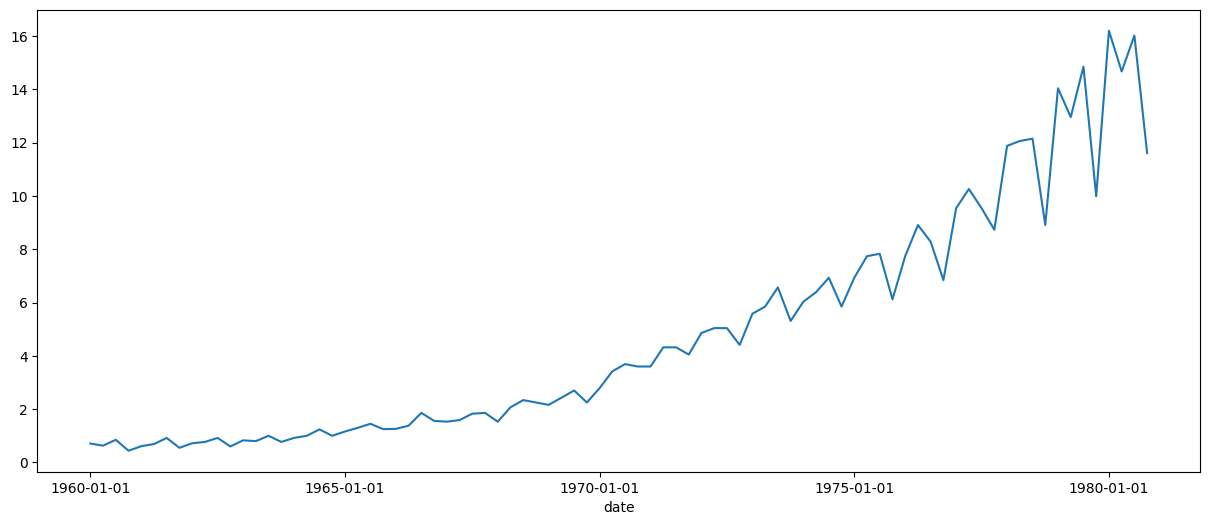

In [7]:
data['data'].plot(figsize=(15,6));

Se aprecia en la gráfica que presenta diferentes estadísticos a lo largo del tiempo.

Representamos su gráfica de autocorrelación. Vemos que tenemos muy complicado determinar el orden p y q, de cara al modelo ARIMA.

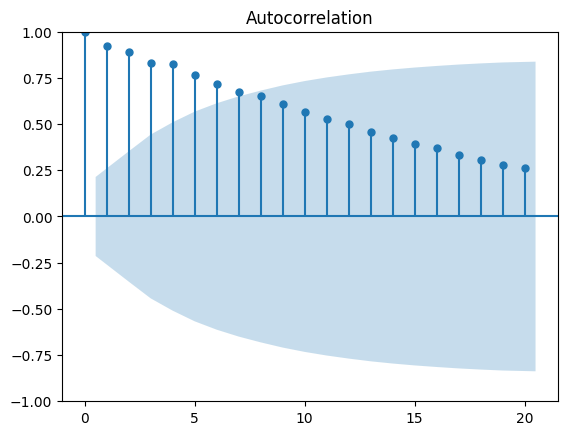

In [8]:
plot_acf(data['data']);

Dividimos en train y test

In [9]:
X = data['data'].values
train = X[:70]
test = X[70:]

In [10]:
len(X)

84

In [11]:
test

array([ 9.54    ,  8.729999, 11.88    , 12.06    , 12.15    ,  8.91    ,
       14.04    , 12.96    , 14.85    ,  9.99    , 16.2     , 14.67    ,
       16.02    , 11.61    ])

In [12]:
len(test)

14

In [13]:
train

array([ 0.71,  0.63,  0.85,  0.44,  0.61,  0.69,  0.92,  0.55,  0.72,
        0.77,  0.92,  0.6 ,  0.83,  0.8 ,  1.  ,  0.77,  0.92,  1.  ,
        1.24,  1.  ,  1.16,  1.3 ,  1.45,  1.25,  1.26,  1.38,  1.86,
        1.56,  1.53,  1.59,  1.83,  1.86,  1.53,  2.07,  2.34,  2.25,
        2.16,  2.43,  2.7 ,  2.25,  2.79,  3.42,  3.69,  3.6 ,  3.6 ,
        4.32,  4.32,  4.05,  4.86,  5.04,  5.04,  4.41,  5.58,  5.85,
        6.57,  5.31,  6.03,  6.39,  6.93,  5.85,  6.93,  7.74,  7.83,
        6.12,  7.74,  8.91,  8.28,  6.84,  9.54, 10.26])

In [14]:
" con el resultado de 1 vemos que no tenemos estacionalidad"
adfuller(data["data"])

(2.7420165734574766,
 1.0,
 11,
 72,
 {'1%': -3.524624466842421,
  '5%': -2.9026070739026064,
  '10%': -2.5886785262345677},
 82.63760283301104)

## Autoregressive
Tendremos que encontrar el orden de autoregression que mejor encaje con nuestros datos.

In [16]:
ARIMA?? # order = AR, i, MA, todo esto dentro de una tupla, eso es lo qeu le pasamos a la función ARIMA

Init signature:
ARIMA(
    order,
    seasonal_order=(0, 0, 0, 0),
    start_params=None,
    method='lbfgs',
    maxiter=50,
    suppress_warnings=False,
    out_of_sample_size=0,
    scoring='mse',
    scoring_args=None,
    trend=None,
    with_intercept=True,
    **sarimax_kwargs,
)
Source:        
class ARIMA(BaseARIMA):
    """An ARIMA estimator.

    An ARIMA, or autoregressive integrated moving average, is a
    generalization of an autoregressive moving average (ARMA) and is fitted to
    time-series data in an effort to forecast future points. ARIMA models can
    be especially efficacious in cases where data shows evidence of
    non-stationarity.

    The "AR" part of ARIMA indicates that the evolving variable of interest is
    regressed on its own lagged (i.e., prior observed) values. The "MA" part
    indicates that the regression error is actually a linear combination of
    error terms whose values occurred contemporaneously and at various times
    in the past. The "I

In [25]:
""" 1,0,0 singinifa que cogemos el numero de antes para calcular el siguiente, no tocamos la curva, y no hay correción de ruido"""
model_ar = ARIMA(order=(9,0,0))# cambiamos a 9
model_ar.fit(train)

ARIMA(order=(9, 0, 0))

In [26]:
predictions = model_ar.predict(14)
print("root_mean_squared_error:", np.sqrt(mean_squared_error(test, predictions)))

root_mean_squared_error: 2.4576592454733723


In [27]:
from sklearn.metrics import r2_score
print("r2_score:", r2_score(test, predictions))

r2_score: -0.026075541300269567


In [28]:
predictions

array([ 9.08912802,  7.99058719, 10.75729381, 11.04373425,  9.75846768,
        9.18174514, 11.90098786, 11.57174763, 10.24848119, 10.22117484,
       12.80072553, 11.91243906, 10.67264263, 11.11886068])

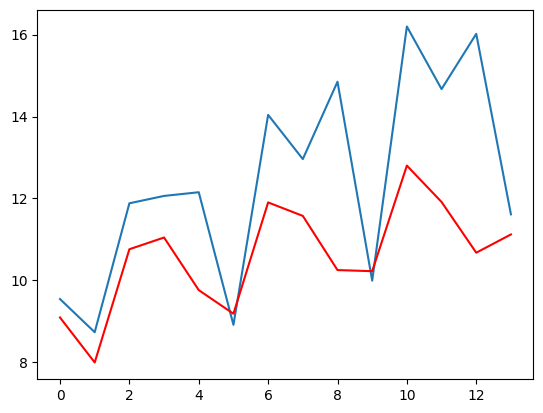

In [29]:
plt.plot(test)
plt.plot(predictions,color='red'); # hemos hecho un claculo previo con 1 de AR y sale mucho peor

No parece que de buen resultado el AR(1,0,0). Probemos diferentes lags, a ver cuál sería el mejor

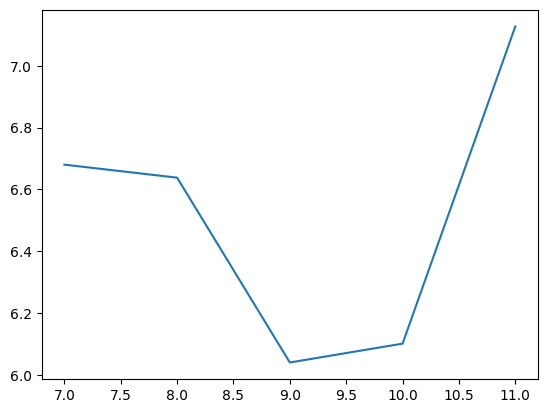

In [30]:
lags = []
mse = []
for lag in range(7, 12):
    try:
        model_ar = ARIMA(order=(lag, 0, 0))
        model_ar.fit(train)
        lags.append(lag)
        predictions = model_ar.predict(14)
        mse.append(mean_squared_error(test, predictions))
    except:
        continue
    
plt.plot(lags, mse);

Un parámetro p>5 parece que da buen resultado, pero aun asi es muy alto el error.

## Moving Average
En este caso tendremos en cuenta los errores. El problema es que si tenemos muchos errores al principio, los iremos arrastrando durante las predicciones.

In [32]:
model_ma = ARIMA(order = (0,0,1))
model_ma.fit(train)

ARIMA(order=(0, 0, 1))

In [33]:
predictions = model_ma.predict(14)
print("mean_squared_error:", mean_squared_error(test, predictions))

mean_squared_error: 87.15679101026309


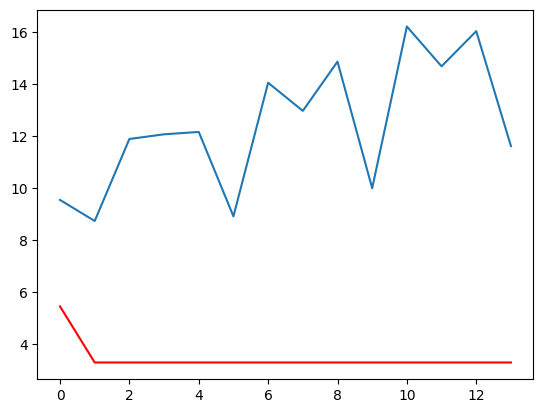

In [34]:
plt.plot(test)
plt.plot(predictions,color='red');

No está dando buen resultado. Probaremos entonces varios lags

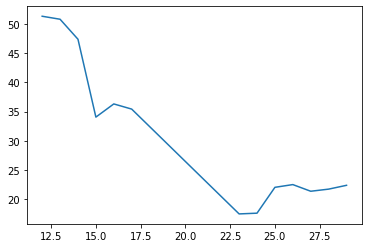

In [43]:
lags = []
mse = []
for lag in range(12, 30):
    try:
        model_ar = ARIMA(order=(0, 0, lag))
        model_ar_fit = model_ar.fit(train)
        predictions = model_ar_fit.predict(14)
        lags.append(lag)
        mse.append(mean_squared_error(test, predictions))
    except:
        continue
    
plt.plot(lags, mse);

Parece que según vamos aumentando el parámetro `q` del modelo Moving Average, va disminuyendo el error, pero aun así es bastante grande.

## ARIMA
En el arima no solo influyen los parámetros `p` y `q`, sino que también tendremos en cuenta `d`. Parametro con el que diferenciaremos la serie y conseguiremos que sea estacionaria.

Ahora bien, ¿cuál es la mejor combinación de parámetros? Tendremos que realizar varias pruebas. Para comparar los modelos se suele utilizar el AIC.

### AIC
Akaike’s Information Criterion

![imagen](./img/aic.png)

k es el número de parámetros del modelo estadístico y L es el máximo valor de la función de verosimilitud para el modelo estimado. La función de verosimilitud permite realizar inferencias a partir de u conjunto de observaciones.

Se utiliza para seleccionar el mejor modelo, que será el que tiene menor AIC. El AIC depende mucho de cada dato, y es una medida de comparación entre modelos, no de presentación de resultados. Un AIC bajo no quiere decir que el modelo sea muy bueno. Por tanto, AIC no nos dice nada sobre la calidad del modelo en terminos absolutos.


#### ¿Cómo conseguir los mejores p, d, q?

In [35]:
import itertools
p = range(8,10)
q = range(20, 24)
d = range(0,3)
pdq = list(itertools.product(p,d,q))
pdq

[(8, 0, 20),
 (8, 0, 21),
 (8, 0, 22),
 (8, 0, 23),
 (8, 1, 20),
 (8, 1, 21),
 (8, 1, 22),
 (8, 1, 23),
 (8, 2, 20),
 (8, 2, 21),
 (8, 2, 22),
 (8, 2, 23),
 (9, 0, 20),
 (9, 0, 21),
 (9, 0, 22),
 (9, 0, 23),
 (9, 1, 20),
 (9, 1, 21),
 (9, 1, 22),
 (9, 1, 23),
 (9, 2, 20),
 (9, 2, 21),
 (9, 2, 22),
 (9, 2, 23)]

In [36]:
len(pdq)

24

In [37]:
results = []
for param in pdq:
    try:
        model_arima = ARIMA(order=param)
        model_arima_fit = model_arima.fit(train)
        results.append((param,model_arima_fit.aic()))
    except:
        continue
    

In [39]:
""" se trata de un error, con lo que la mejor opción será aquella que tenga el valor mas bajo"""

resultados_df = pd.DataFrame(results, columns=['ARIMA params', 'AIC']).sort_values('AIC')
resultados_df.head()

,ARIMA params,AIC
10,"(8, 2, 22)",59.053639
9,"(8, 2, 21)",59.355498
4,"(8, 1, 20)",60.333909
21,"(9, 2, 21)",60.959571
11,"(8, 2, 23)",61.449410


In [40]:
len(resultados_df)

24

Ya tenemos la mejor combinación de parámetros para el ARIMA. Probemos el modelo

In [41]:
best_model = ARIMA(order=(8, 2, 23))
best_model.fit(train)

ARIMA(order=(8, 2, 23))

In [42]:
predictions = best_model.predict(14)
print("mean_squared_error:", mean_squared_error(test, predictions))

mean_squared_error: 5.72086763660839


In [43]:
print("mean_squared_error:", r2_score(test, predictions))

mean_squared_error: 0.028152997555759063


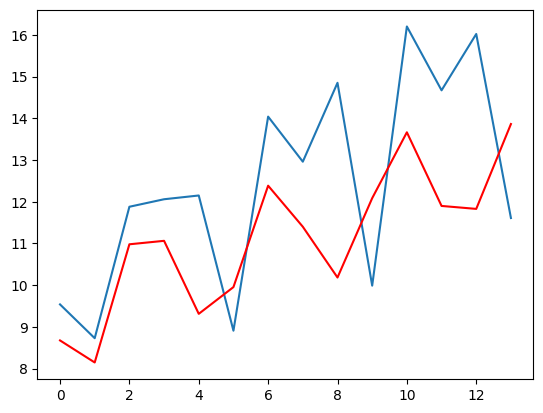

In [44]:
plt.plot(test)
plt.plot(predictions,color='red');

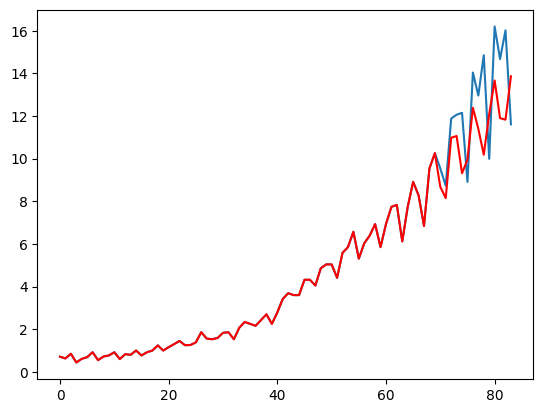

In [45]:
plt.plot(train.tolist() + test.tolist())
plt.plot(train.tolist()  + predictions.tolist(),color='red');

### Auto ARIMA

In [46]:
""" LOVE máximo para esto"""
model = auto_arima(train,
                   start_p = 2,
                   start_q = 2,
                   start_d = 2,
                   max_p = 10,
                   max_q = 10,
                   max_d = 6,
                   trace=True)

Performing stepwise search to minimize aic
 ARIMA(2,2,2)(0,0,0)[0]             : AIC=83.049, Time=0.24 sec
 ARIMA(0,2,0)(0,0,0)[0]             : AIC=196.672, Time=0.00 sec
 ARIMA(1,2,0)(0,0,0)[0]             : AIC=180.443, Time=0.02 sec
 ARIMA(0,2,1)(0,0,0)[0]             : AIC=140.942, Time=0.02 sec
 ARIMA(1,2,2)(0,0,0)[0]             : AIC=137.570, Time=0.08 sec
 ARIMA(2,2,1)(0,0,0)[0]             : AIC=113.935, Time=0.05 sec
 ARIMA(3,2,2)(0,0,0)[0]             : AIC=42.673, Time=0.14 sec
 ARIMA(3,2,1)(0,0,0)[0]             : AIC=47.310, Time=0.11 sec
 ARIMA(4,2,2)(0,0,0)[0]             : AIC=44.654, Time=0.28 sec
 ARIMA(3,2,3)(0,0,0)[0]             : AIC=44.530, Time=0.21 sec
 ARIMA(2,2,3)(0,0,0)[0]             : AIC=82.336, Time=0.11 sec
 ARIMA(4,2,1)(0,0,0)[0]             : AIC=44.000, Time=0.18 sec
 ARIMA(4,2,3)(0,0,0)[0]             : AIC=45.523, Time=0.31 sec
 ARIMA(3,2,2)(0,0,0)[0] intercept   : AIC=37.008, Time=0.20 sec
 ARIMA(2,2,2)(0,0,0)[0] intercept   : AIC=83.502, Time=0

In [47]:
model = ARIMA(order=(3,2,2))
model.fit(train)
print(model.summary())

                               SARIMAX Results                                
Dep. Variable:                      y   No. Observations:                   70
Model:               SARIMAX(3, 2, 2)   Log Likelihood                 -11.504
Date:                Mon, 20 May 2024   AIC                             37.008
Time:                        14:06:22   BIC                             52.544
Sample:                             0   HQIC                            43.164
                                 - 70                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept      0.0175      0.002      7.252      0.000       0.013       0.022
ar.L1         -1.1108      0.054    -20.736      0.000      -1.216      -1.006
ar.L2         -1.0938      0.050    -21.799      0.0

In [48]:
predictions = model.predict(14)
print("mean_squared_error:", mean_squared_error(test, predictions))

mean_squared_error: 3.940893091513097


In [49]:
predictions = model.predict(14)
print("mean_squared_error:", r2_score(test, predictions))

mean_squared_error: 0.33053071995023475


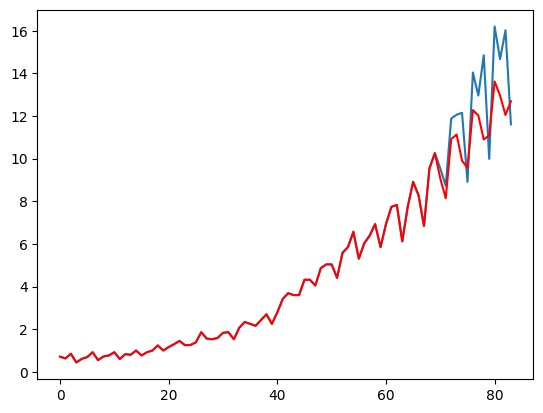

In [50]:
plt.plot(train.tolist() + test.tolist())
plt.plot(train.tolist()  + predictions.tolist(),color='red');

## ARIMAX
La X viene de exogenous. Significa que le podemos añadir una variable externa con la que entrenar el modelo.

Vamos a probar con los datos de la bolsa. Primero un auto_arima con los datos a cierre. Y después un auto_arima acompañado de los datos de apertura de bolsa, a ver cuánto ayudan a predecir el cierre.

In [51]:
stock_df = pd.read_csv('data/FB.csv', header=0, index_col=0)
print(len(stock_df))
stock_df.head()

1259


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2014-12-08,76.180000,77.250000,75.400002,76.519997,76.519997,25733900
2014-12-09,75.199997,76.930000,74.779999,76.839996,76.839996,25358600
2014-12-10,76.650002,77.550003,76.070000,76.180000,76.180000,32210500
2014-12-11,76.519997,78.519997,76.480003,77.730003,77.730003,33462100
2014-12-12,77.160004,78.879997,77.019997,77.830002,77.830002,28091600


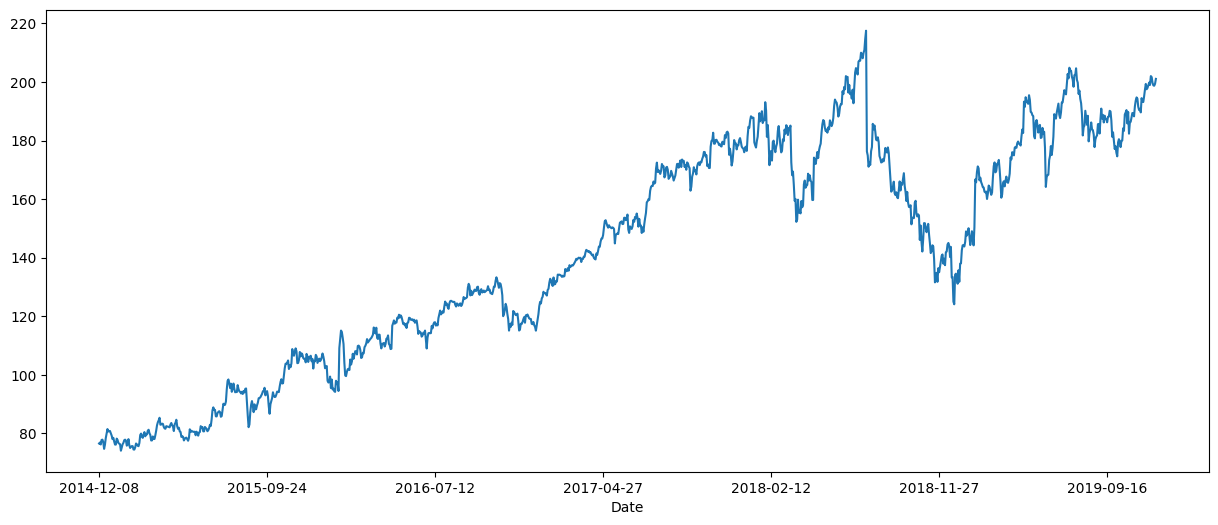

In [52]:
stock_df['Close'].plot(figsize=(15,6));

In [53]:
len(stock_df['Close'])

1259

In [54]:
stock_df['Close'][:600].describe()

count    600.000000
mean     106.499583
std       19.865461
min       74.050003
25%       87.932497
50%      107.840001
75%      121.807497
max      146.559998
Name: Close, dtype: float64

In [55]:
stock_df['Close'][600:].describe()

count    659.000000
mean     173.255326
std       17.356365
min      124.059998
25%      162.514999
50%      175.130005
75%      185.550003
max      217.500000
Name: Close, dtype: float64

Vemos primero ejemplo sin variable exogena

In [56]:
train = stock_df['Close'][0:1240].values
test = stock_df['Close'][1240:].values

In [57]:
len(test)

19

Vamos a probar varios ARIMAS, a ver cuál sería la mejor combinación de hiperparámetros.

In [58]:
auto_arima??

Signature:
auto_arima(
    y,
    X=None,
    start_p=2,
    d=None,
    start_q=2,
    max_p=5,
    max_d=2,
    max_q=5,
    start_P=1,
    D=None,
    start_Q=1,
    max_P=2,
    max_D=1,
    max_Q=2,
    max_order=5,
    m=1,
    seasonal=True,
    stationary=False,
    information_criterion='aic',
    alpha=0.05,
    test='kpss',
    seasonal_test='ocsb',
    stepwise=True,
    n_jobs=1,
    start_params=None,
    trend=None,
    method='lbfgs',
    maxiter=50,
    offset_test_args=None,
    seasonal_test_args=None,
    suppress_warnings=True,
    error_action='trace',
    trace=False,
    random=False,
    random_state=None,
    n_fits=10,
    return_valid_fits=False,
    out_of_sample_size=0,
    scoring='mse',
    scoring_args=None,
    with_intercept='auto',
    sarimax_kwargs=None,
    **fit_args,
)
Docstring:
Automatically discover the optimal order for an ARIMA model.

The auto-ARIMA process seeks to identify the most optimal
parameters for an ``ARIMA`` model, settling on a

In [59]:
stepwise_model = auto_arima(train,
                            start_p=1,
                            start_q=1,
                            max_d=3,
                            max_p=5,
                            max_q=5,
                            stationary=False,
                            trace=True,
                           stepwise=True)
print(stepwise_model.aic())


Performing stepwise search to minimize aic
 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=5973.080, Time=0.63 sec
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=5975.597, Time=0.00 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=5977.174, Time=0.05 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=5977.161, Time=0.26 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=5975.049, Time=0.02 sec
 ARIMA(2,1,1)(0,0,0)[0] intercept   : AIC=5974.760, Time=0.30 sec
 ARIMA(1,1,2)(0,0,0)[0] intercept   : AIC=inf, Time=0.85 sec
 ARIMA(0,1,2)(0,0,0)[0] intercept   : AIC=5978.841, Time=0.17 sec
 ARIMA(2,1,0)(0,0,0)[0] intercept   : AIC=5978.892, Time=0.05 sec
 ARIMA(2,1,2)(0,0,0)[0] intercept   : AIC=inf, Time=1.07 sec
 ARIMA(1,1,1)(0,0,0)[0]             : AIC=5973.656, Time=0.22 sec

Best model:  ARIMA(1,1,1)(0,0,0)[0] intercept
Total fit time: 3.616 seconds
5973.079583154759


Ya lo tenemos, ahora montaremos el modelo con esos hiperparámetros y vemos que AIC tiene.

In [60]:
model = ARIMA(order=(1,1,1))
model.fit(train)
print(model.summary())

                               SARIMAX Results                                
Dep. Variable:                      y   No. Observations:                 1240
Model:               SARIMAX(1, 1, 1)   Log Likelihood               -2982.540
Date:                Mon, 20 May 2024   AIC                           5973.080
Time:                        14:13:14   BIC                           5993.568
Sample:                             0   HQIC                          5980.785
                               - 1240                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept      0.0125      0.012      1.065      0.287      -0.010       0.035
ar.L1          0.8642      0.086     10.020      0.000       0.695       1.033
ma.L1         -0.9007      0.075    -11.984      0.0

In [74]:
predictions = model.predict(19)
print("mean_squared_error:", mean_squared_error(test, predictions))

mean_squared_error: 43.150001367506896


In [75]:
from sklearn.metrics import r2_score


In [76]:

predictions = model.predict(19)
print("mean_squared_error:", np.sqrt(mean_squared_error(test, predictions)))

mean_squared_error: 6.568866064056025


In [77]:
predictions = model.predict(19)
print("r2_error:", r2_score(test, predictions))

r2_error: -3.36123848714083


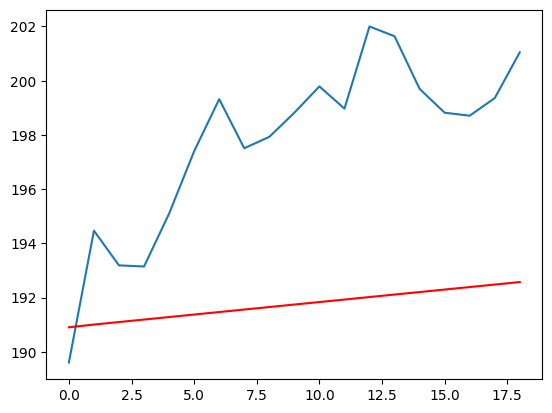

In [78]:
plt.plot(test)
plt.plot(predictions,color='red');

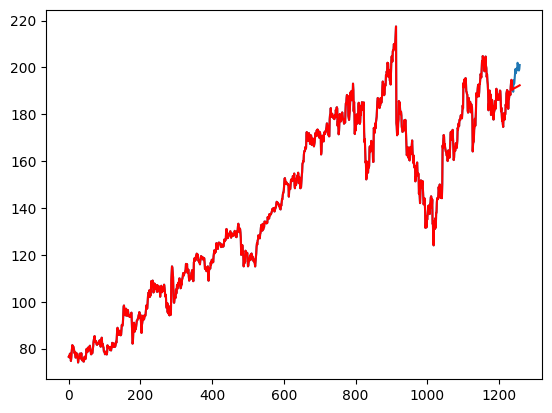

In [66]:
plt.plot(train.tolist() + test.tolist())
plt.plot(train.tolist()  + predictions.tolist(),color='red');

Vamos ahora a compararlo con el mismo modelo, pero en este caso le añadimos una variable exogena al entrenamiento

In [67]:
stock_df[['Open']][:1240].values

array([[ 76.18    ],
       [ 75.199997],
       [ 76.650002],
       ...,
       [194.029999],
       [191.910004],
       [190.      ]])

In [68]:
model = ARIMA(order=(1,1,1))
model.fit(train, exogenous = stock_df['Open'][:1240].values.reshape(-1,1))
print(model.summary())

                               SARIMAX Results                                
Dep. Variable:                      y   No. Observations:                 1240
Model:               SARIMAX(1, 1, 1)   Log Likelihood               -2982.540
Date:                Mon, 20 May 2024   AIC                           5973.080
Time:                        14:15:33   BIC                           5993.568
Sample:                             0   HQIC                          5980.785
                               - 1240                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept      0.0125      0.012      1.065      0.287      -0.010       0.035
ar.L1          0.8642      0.086     10.020      0.000       0.695       1.033
ma.L1         -0.9007      0.075    -11.984      0.0

Reduce bastante el AIC

Probemos a entrenar el auto arima con la variable exogena

In [69]:
model = auto_arima(train,
                   exogenous = stock_df['Open'][:1240].values.reshape(-1,1),
                   start_p=1,
                    start_q=1,
                    max_d=3,
                    max_p=5,
                    max_q=5,
                    stationary=False,
                    trace=True,
                    stepwise=True)

print(model.aic())

Performing stepwise search to minimize aic
 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=5973.080, Time=0.52 sec
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=5975.597, Time=0.01 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=5977.174, Time=0.04 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=5977.161, Time=0.08 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=5975.049, Time=0.01 sec
 ARIMA(2,1,1)(0,0,0)[0] intercept   : AIC=5974.760, Time=0.42 sec
 ARIMA(1,1,2)(0,0,0)[0] intercept   : AIC=inf, Time=0.89 sec
 ARIMA(0,1,2)(0,0,0)[0] intercept   : AIC=5978.841, Time=0.23 sec
 ARIMA(2,1,0)(0,0,0)[0] intercept   : AIC=5978.892, Time=0.07 sec
 ARIMA(2,1,2)(0,0,0)[0] intercept   : AIC=inf, Time=1.23 sec
 ARIMA(1,1,1)(0,0,0)[0]             : AIC=5973.656, Time=0.17 sec

Best model:  ARIMA(1,1,1)(0,0,0)[0] intercept
Total fit time: 3.672 seconds
5973.079583154759


Probemos varias variables exogenas

NOTA: para este apartado se utiliza el valor 'Low', que en la vida real no lo tendriamos para realizar la predicción.

In [70]:
model = auto_arima(train,
                   exogenous = stock_df[['Open', 'Low']][:1240].values,
                   start_p=1,
                    start_q=1,
                    max_d=3,
                    max_p=5,
                    max_q=5,
                    stationary=False,
                    trace=True,
                    stepwise=True)

print(model.aic())



Performing stepwise search to minimize aic
 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=5973.080, Time=0.45 sec
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=5975.597, Time=0.02 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=5977.174, Time=0.03 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=5977.161, Time=0.28 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=5975.049, Time=0.02 sec
 ARIMA(2,1,1)(0,0,0)[0] intercept   : AIC=5974.760, Time=0.39 sec
 ARIMA(1,1,2)(0,0,0)[0] intercept   : AIC=inf, Time=1.18 sec
 ARIMA(0,1,2)(0,0,0)[0] intercept   : AIC=5978.841, Time=0.31 sec
 ARIMA(2,1,0)(0,0,0)[0] intercept   : AIC=5978.892, Time=0.27 sec
 ARIMA(2,1,2)(0,0,0)[0] intercept   : AIC=inf, Time=1.58 sec
 ARIMA(1,1,1)(0,0,0)[0]             : AIC=5973.656, Time=0.09 sec

Best model:  ARIMA(1,1,1)(0,0,0)[0] intercept
Total fit time: 4.635 seconds
5973.079583154759


In [71]:
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                      y   No. Observations:                 1240
Model:               SARIMAX(1, 1, 1)   Log Likelihood               -2982.540
Date:                Mon, 20 May 2024   AIC                           5973.080
Time:                        14:15:52   BIC                           5993.568
Sample:                             0   HQIC                          5980.785
                               - 1240                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept      0.0125      0.012      1.065      0.287      -0.010       0.035
ar.L1          0.8642      0.086     10.020      0.000       0.695       1.033
ma.L1         -0.9007      0.075    -11.984      0.000      -1.048      -0.753
sigma2         7.2179      0.082     88.322      0.000       7.058       7.378
===================================================================================
Ljung-Box (L1) (Q):                   0.20   Jarque-Bera (JB):            113668.62
Prob(Q):                              0.65   Prob(JB):                         0.00
Heteroskedasticity (H):               4.82   Skew:                            -2.83
Prob(H) (two-sided):                  0.00   Kurtosis:                        49.58
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

mean_squared_error: 45.03461604531848
r2_error: -3.55171945598946


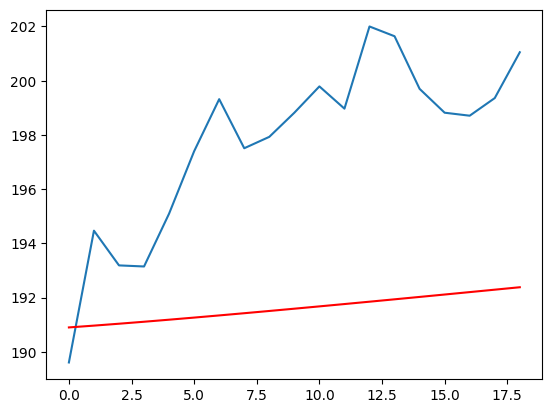

In [72]:
model = ARIMA(order=(1,1,1))
model.fit(train, exogenous = stock_df[['Open']][:1240].values)
predictions = model.predict(19 , exogenous = stock_df[['Open']][1240:])
print("mean_squared_error:", mean_squared_error(test, predictions))
print("r2_error:", r2_score(test, predictions))
plt.plot(test)
plt.plot(predictions,color='red');

mean_squared_error: 43.150001367506896


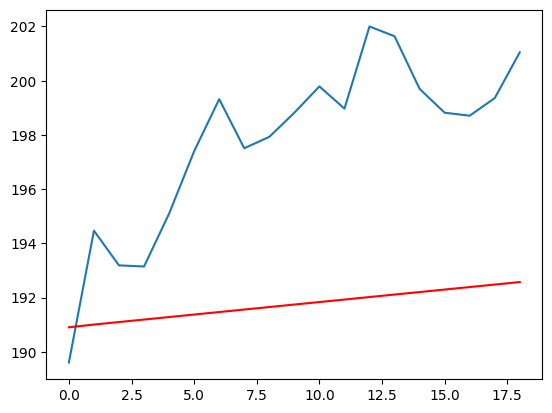

In [73]:
model = ARIMA(order=(3,1,1))
model.fit(train, exogenous = stock_df[['Open', 'Low']][:1240].values)
predictions = model.predict(19 , exogenous = stock_df[['Open', 'Low']][1240:])
print("mean_squared_error:", mean_squared_error(test, predictions))
plt.plot(test)
plt.plot(predictions,color='red');

## SARIMA
Veamos cómo podemos predecir con datos que tienen estacionalidad, es decir, que cuentan con un patrón que se repite a lo largo del tiempo.

In [79]:
df = pd.read_csv('data/a10.csv', parse_dates=['date'], index_col='date')
print(len(df))
df.head()

204


,value
date,
1991-07-01,3.526591
1991-08-01,3.180891
1991-09-01,3.252221
1991-10-01,3.611003
1991-11-01,3.565869


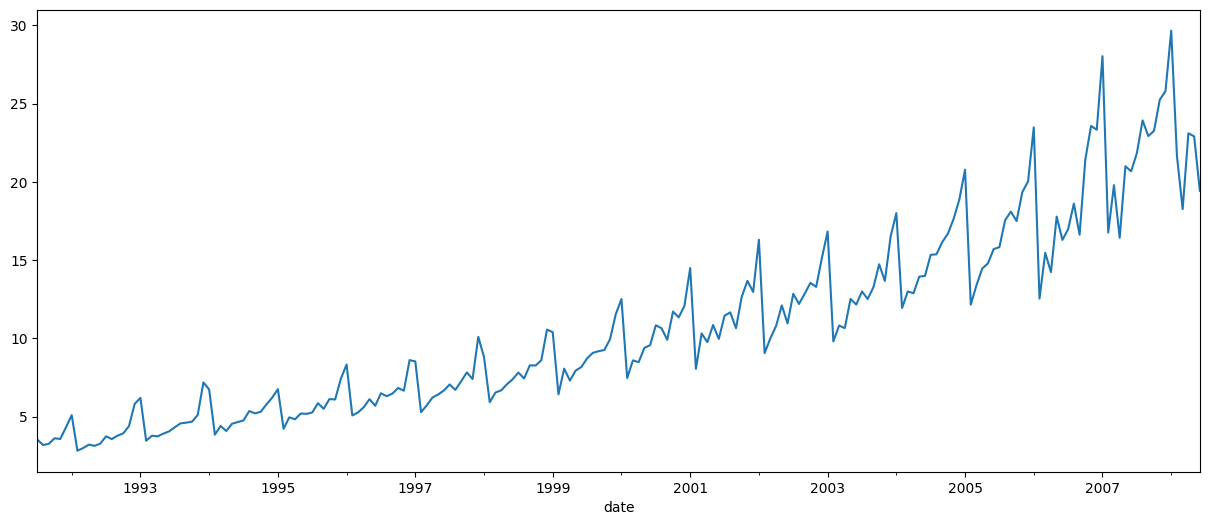

In [80]:
df['value'].plot(figsize=(15,6));

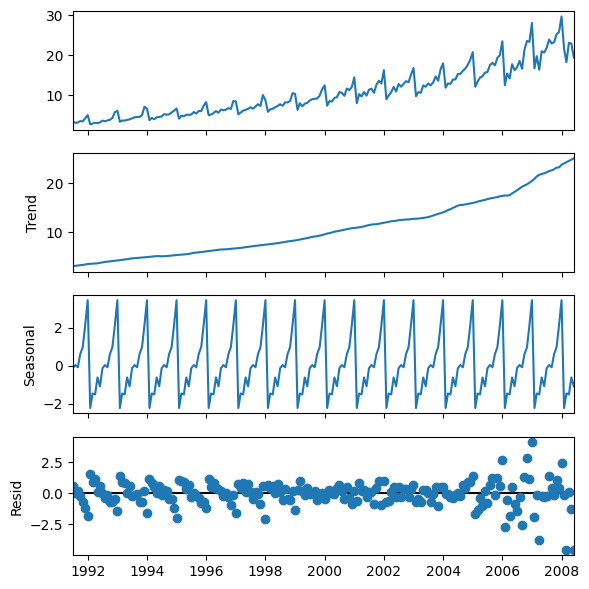

In [81]:
from statsmodels.tsa.seasonal import seasonal_decompose

result_add = seasonal_decompose(df[['value']], model='additive', extrapolate_trend='freq')

# Plot
plt.rcParams.update({'figure.figsize': (6,6)})
result_add.plot();

In [82]:
X = df[['value']]
train = X[:-20]
test = X[-20:]

In [83]:
len(test)

20

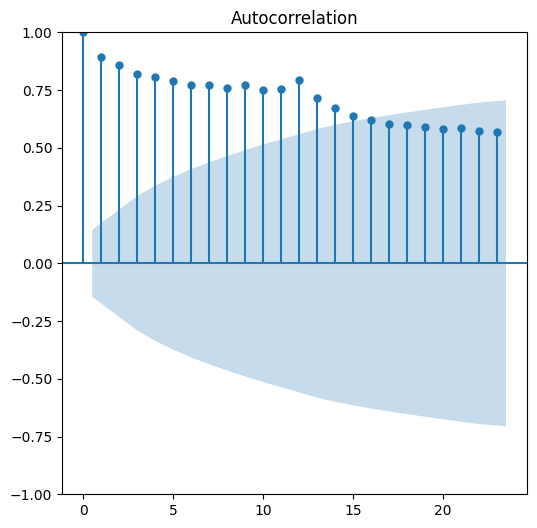

In [84]:
plot_acf(train);

Probemos el auto arima sin indicarle que hay componente de seasonality

Ahora le añadimos el componente seasonality mediante el parametro `m`.

In [85]:
model = auto_arima(train,
                    start_p=1,
                    start_q=1,
                    max_d=3,
                    max_p=5,
                    max_q=5,
                    m = 12,
                    trace=True,
                    stepwise=True)

print(model.aic())

predictions = model.predict(20)
print("mean_squared_error:", mean_squared_error(test, predictions))

Performing stepwise search to minimize aic
 ARIMA(1,1,1)(1,1,1)[12]             : AIC=359.383, Time=0.44 sec
 ARIMA(0,1,0)(0,1,0)[12]             : AIC=480.967, Time=0.02 sec
 ARIMA(1,1,0)(1,1,0)[12]             : AIC=391.380, Time=0.32 sec
 ARIMA(0,1,1)(0,1,1)[12]             : AIC=366.538, Time=0.13 sec
 ARIMA(1,1,1)(0,1,1)[12]             : AIC=357.778, Time=0.35 sec
 ARIMA(1,1,1)(0,1,0)[12]             : AIC=367.053, Time=0.06 sec
 ARIMA(1,1,1)(0,1,2)[12]             : AIC=358.591, Time=1.10 sec
 ARIMA(1,1,1)(1,1,0)[12]             : AIC=361.813, Time=0.08 sec
 ARIMA(1,1,1)(1,1,2)[12]             : AIC=357.470, Time=1.56 sec
 ARIMA(1,1,1)(2,1,2)[12]             : AIC=356.290, Time=1.18 sec
 ARIMA(1,1,1)(2,1,1)[12]             : AIC=354.319, Time=0.90 sec
 ARIMA(1,1,1)(2,1,0)[12]             : AIC=353.117, Time=0.41 sec
 ARIMA(0,1,1)(2,1,0)[12]             : AIC=362.795, Time=0.57 sec
 ARIMA(1,1,0)(2,1,0)[12]             : AIC=378.264, Time=0.37 sec
 ARIMA(2,1,1)(2,1,0)[12]         

In [86]:
predictions = model.predict(20)
predictions


2006-11-01    18.570330
2006-12-01    22.084880
2007-01-01    24.115976
2007-02-01    14.365642
2007-03-01    17.673843
2007-04-01    15.421365
2007-05-01    19.613835
2007-06-01    17.414772
2007-07-01    19.077567
2007-08-01    19.775294
2007-09-01    18.593205
2007-10-01    22.553714
2007-11-01    20.329115
2007-12-01    23.594824
2008-01-01    25.213147
2008-02-01    16.140535
2008-03-01    18.666494
2008-04-01    17.487840
2008-05-01    20.446404
2008-06-01    19.188686
Freq: MS, dtype: float64

In [87]:
test["value"]

date
2006-11-01    23.575517
2006-12-01    23.334206
2007-01-01    28.038383
2007-02-01    16.763869
2007-03-01    19.792754
2007-04-01    16.427305
2007-05-01    21.000742
2007-06-01    20.681002
2007-07-01    21.834890
2007-08-01    23.930204
2007-09-01    22.930357
2007-10-01    23.263340
2007-11-01    25.250030
2007-12-01    25.806090
2008-01-01    29.665356
2008-02-01    21.654285
2008-03-01    18.264945
2008-04-01    23.107677
2008-05-01    22.912510
2008-06-01    19.431740
Name: value, dtype: float64

In [88]:
predictions

2006-11-01    18.570330
2006-12-01    22.084880
2007-01-01    24.115976
2007-02-01    14.365642
2007-03-01    17.673843
2007-04-01    15.421365
2007-05-01    19.613835
2007-06-01    17.414772
2007-07-01    19.077567
2007-08-01    19.775294
2007-09-01    18.593205
2007-10-01    22.553714
2007-11-01    20.329115
2007-12-01    23.594824
2008-01-01    25.213147
2008-02-01    16.140535
2008-03-01    18.666494
2008-04-01    17.487840
2008-05-01    20.446404
2008-06-01    19.188686
Freq: MS, dtype: float64

mean_squared_error: 11.361839250477036


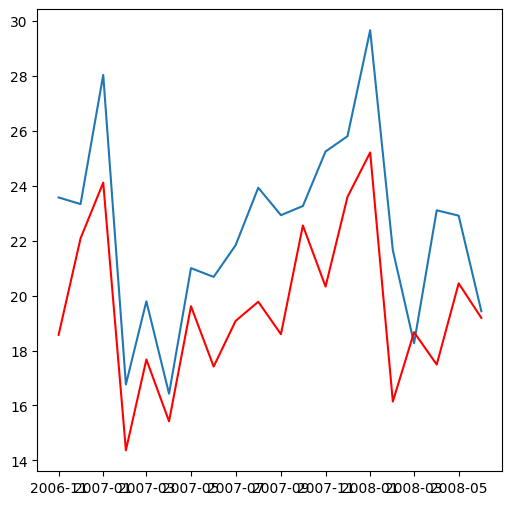

In [89]:

print("mean_squared_error:", mean_squared_error(test, predictions))
plt.plot(test.value)
plt.plot(predictions, color='red');

In [90]:
print("r2_error:", r2_score(test, predictions))

r2_error: -0.04903123170776924


In [91]:
train.values.reshape(1,-1)[0]

array([ 3.526591  ,  3.180891  ,  3.252221  ,  3.611003  ,  3.565869  ,
        4.306371  ,  5.088335  ,  2.81452   ,  2.985811  ,  3.20478   ,
        3.127578  ,  3.270523  ,  3.73785082,  3.55877609,  3.77720173,
        3.92449042,  4.38653092,  5.81054917,  6.19206769,  3.45085699,
        3.77230686,  3.7343029 ,  3.90539892,  4.04968714,  4.31556552,
        4.56218455,  4.60866203,  4.66785129,  5.09384145,  7.1799622 ,
        6.73147308,  3.84127758,  4.39407557,  4.07534073,  4.5406449 ,
        4.64561508,  4.75260653,  5.35060467,  5.20445484,  5.3016513 ,
        5.77374216,  6.20459348,  6.74948382,  4.21606735,  4.94934946,
        4.8230449 ,  5.19475419,  5.17078711,  5.25674157,  5.85527729,
        5.49072901,  6.11529323,  6.08847284,  7.41659792,  8.32945212,
        5.06979585,  5.26255667,  5.59712628,  6.110296  ,  5.68916084,
        6.48684933,  6.30056933,  6.46747574,  6.82862939,  6.64907826,
        8.60693721,  8.52447101,  5.27791837,  5.71430345,  6.21

In [92]:
predictions.tolist()

[18.570329528373673,
 22.08487980184706,
 24.115976496081334,
 14.36564153862803,
 17.673843485530004,
 15.42136473089148,
 19.61383493351846,
 17.41477157617699,
 19.07756669026324,
 19.775293982902724,
 18.59320515272832,
 22.55371413313775,
 20.329115243836462,
 23.594823863139254,
 25.213147049451244,
 16.140535221390447,
 18.666494219188653,
 17.48783985066972,
 20.44640369597511,
 19.1886861105731]

## Transformar dataset para poder predecir con otros modelos

In [123]:
df = pd.read_csv('data/a10.csv', parse_dates=['date'], index_col='date')
print(len(df))
df.head()

204


,value
date,
1991-07-01,3.526591
1991-08-01,3.180891
1991-09-01,3.252221
1991-10-01,3.611003
1991-11-01,3.565869


In [130]:
df.head(15)

,value
date,
1991-07-01,3.526591
1991-08-01,3.180891
1991-09-01,3.252221
1991-10-01,3.611003
1991-11-01,3.565869
1991-12-01,4.306371
1992-01-01,5.088335
1992-02-01,2.814520
1992-03-01,2.985811


In [124]:
for i in range(12,0,-1):
    df['t-'+str(i)] = df['value'].shift(i)

df.dropna(inplace=True)
df

,value,t-12,t-11,t-10,t-9,t-8,t-7,t-6,t-5,t-4,t-3,t-2,t-1
date,,,,,,,,,,,,,
1992-07-01,3.737851,3.526591,3.180891,3.252221,3.611003,3.565869,4.306371,5.088335,2.814520,2.985811,3.204780,3.127578,3.270523
1992-08-01,3.558776,3.180891,3.252221,3.611003,3.565869,4.306371,5.088335,2.814520,2.985811,3.204780,3.127578,3.270523,3.737851
1992-09-01,3.777202,3.252221,3.611003,3.565869,4.306371,5.088335,2.814520,2.985811,3.204780,3.127578,3.270523,3.737851,3.558776
1992-10-01,3.924490,3.611003,3.565869,4.306371,5.088335,2.814520,2.985811,3.204780,3.127578,3.270523,3.737851,3.558776,3.777202
1992-11-01,4.386531,3.565869,4.306371,5.088335,2.814520,2.985811,3.204780,3.127578,3.270523,3.737851,3.558776,3.777202,3.924490
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2008-02-01,21.654285,16.763869,19.792754,16.427305,21.000742,20.681002,21.834890,23.930204,22.930357,23.263340,25.250030,25.806090,29.665356
2008-03-01,18.264945,19.792754,16.427305,21.000742,20.681002,21.834890,23.930204,22.930357,23.263340,25.250030,25.806090,29.665356,21.654285
2008-04-01,23.107677,16.427305,21.000742,20.681002,21.834890,23.930204,22.930357,23.263340,25.250030,25.806090,29.665356,21.654285,18.264945


In [125]:
from sklearn.model_selection import train_test_split

In [126]:
X_train, X_test, y_train, y_test = train_test_split(df.drop("value", axis=1), df["value"])

In [127]:
from sklearn.ensemble import RandomForestRegressor

In [128]:
rf_reg = RandomForestRegressor(max_depth=3, n_estimators=500)

In [144]:
y_train

date
1993-11-01     5.093841
2008-03-01    18.264945
2007-04-01    16.427305
2001-07-01    11.443601
2003-12-01    16.503966
                ...    
2006-02-01    12.536987
1996-06-01     5.689161
2001-09-01    10.647060
2006-07-01    16.980282
1993-12-01     7.179962
Name: value, Length: 144, dtype: float64

In [129]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(df.drop("value", axis=1), df["value"])
from sklearn.ensemble import RandomForestRegressor
rf_reg = RandomForestRegressor(max_depth=3, n_estimators=500)
rf_reg.fit(X_train, y_train)
rf_reg.score(X_test, y_test)

RandomForestRegressor(max_depth=3, n_estimators=500)

In [131]:
rf_reg.score(X_test, y_test)

0.9614691591485242

In [122]:
from sklearn.impute import KNNImputer
import numpy as np

In [123]:
df = pd.DataFrame({"a": [10,2,3,np.nan, np.nan], "b": [6,np.nan, 8,9,10]})
df

,a,b
0,10.0,6.0
1,2.0,NaN
2,3.0,8.0
3,NaN,9.0
4,NaN,10.0


In [124]:
knni = KNNImputer(n_neighbors = 5)

In [125]:
df = pd.DataFrame(knni.fit_transform(df), columns=df.columns)

In [126]:
df

,a,b
0,10.0,6.00
1,2.0,8.25
2,3.0,8.00
3,5.0,9.00
4,5.0,10.00


NameError: name 'ddf' is not defined